# Lab | Customer Analysis Round 6

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

## Get the data

We are using the marketing_customer_analysis.csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
#changing column names
data.columns = [column.lower().replace(' ', '_') for column in data.columns]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
#changeing date time column
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [6]:
cat = data.select_dtypes('object')
cat.shape

(9134, 15)

In [7]:
#checking for null values
cat.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [8]:
num = data.select_dtypes([np.number])
num.shape

(9134, 8)

In [9]:
num.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

## Dealing with the data

Already done in the round 2.

## Explore the data

Done in the round 3.

In [10]:
data.describe().apply(lambda x: round(x,2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [11]:
data.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


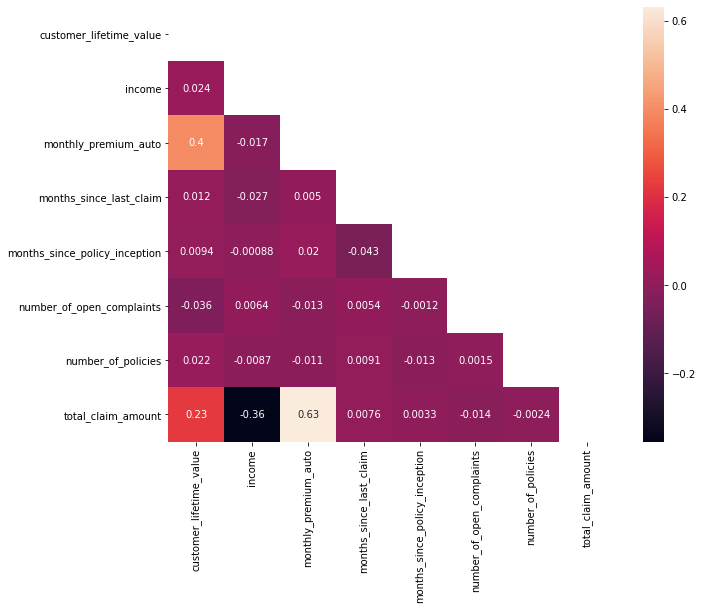

In [12]:
mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

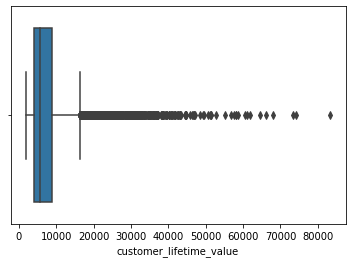

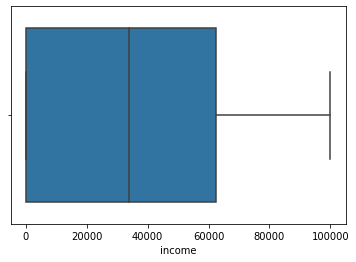

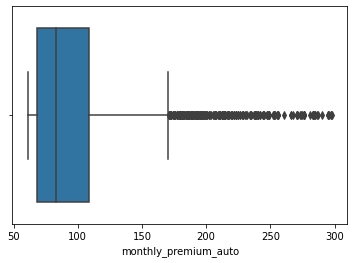

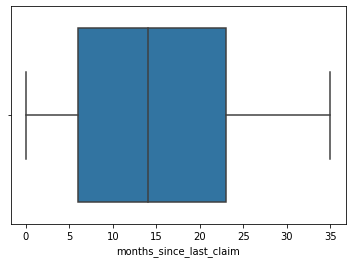

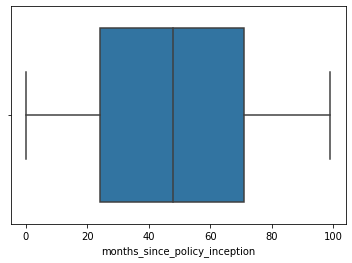

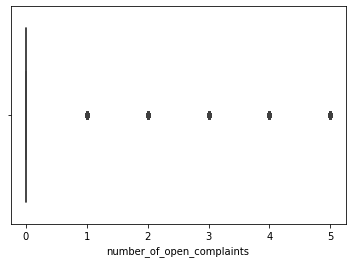

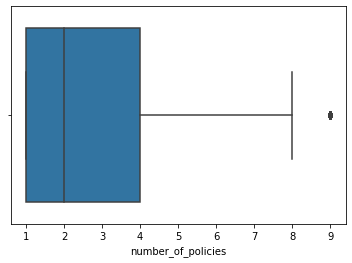

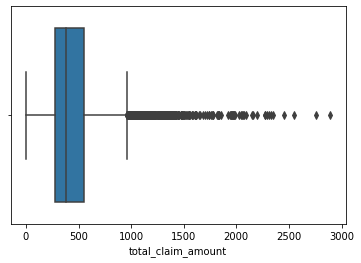

In [13]:
#checking outliers

for col in num.columns:
    sns.boxplot(num[col])
    plt.show()

In [14]:
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [15]:
data, _ci = boxcox_transform(data)
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2.703839,No,Basic,Bachelor,2011-02-24,Employed,F,1247.937066,Suburban,Married,0.685347,10.876059,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,33.035752,Two-Door Car,Medsize
1,QZ44356,Arizona,2.754926,No,Extended,Bachelor,2011-01-31,Unemployed,F,1167.961720,Suburban,Single,0.685871,5.808248,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,56.357614,Four-Door Car,Medsize
2,AI49188,Nevada,2.780772,No,Premium,Bachelor,2011-02-19,Employed,F,1144.063081,Suburban,Married,0.686039,7.347815,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,40.071789,Two-Door Car,Medsize
3,WW63253,California,2.759125,No,Basic,Bachelor,2011-01-20,Unemployed,M,1167.961720,Suburban,Married,0.686018,7.347815,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,38.763252,SUV,Medsize
4,HB64268,Washington,2.704995,No,Basic,Bachelor,2011-02-03,Employed,M,1072.375744,Rural,Single,0.685461,5.471294,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.560154,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,2.801170,No,Basic,Bachelor,2011-02-10,Employed,M,1448.531450,Urban,Married,0.685461,7.347815,33.090025,0.648045,0.607328,Personal Auto,Personal L1,Offer2,Web,23.588905,Four-Door Car,Medsize
9130,PK87824,California,2.711030,Yes,Extended,College,2011-02-12,Employed,F,697.790558,Suburban,Divorced,0.685606,6.134207,13.709541,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,32.792951,Four-Door Car,Medsize
9131,TD14365,California,2.762062,No,Extended,Bachelor,2011-02-06,Unemployed,M,1167.961720,Suburban,Single,0.685725,4.379465,17.034934,1.176115,0.607328,Corporate Auto,Corporate L2,Offer1,Branch,47.263726,Four-Door Car,Medsize
9132,UP19263,California,2.758397,No,Extended,College,2011-02-03,Employed,M,704.383672,Suburban,Married,0.685898,11.319628,1.667871,0.648045,0.893486,Personal Auto,Personal L2,Offer3,Branch,44.225147,Four-Door Car,Large


In [16]:
_ci

{'customer_lifetime_value': [-0.3460077279198611],
 'income': [0.606136983521106],
 'monthly_premium_auto': [-1.4560475713521648],
 'months_since_last_claim': [0.5692435567708527],
 'months_since_policy_inception': [0.7136590106846658],
 'number_of_open_complaints': [0.12272161798485684],
 'number_of_policies': [-0.39015686286007867],
 'total_claim_amount': [0.4718167582845637]}

In [17]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [18]:
num1 = num.copy()

num1 = remove_outliers(num1, threshold=1.5, in_columns=num1.columns, skip_columns=['customer_lifetime_value']) 
num1 #why am I getting this error??

IndexError: cannot do a non-empty take from an empty axes.

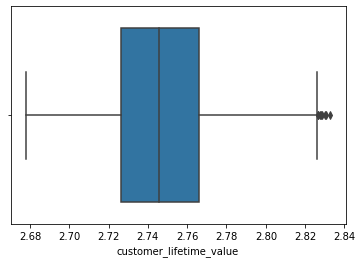

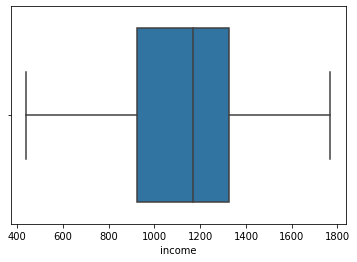

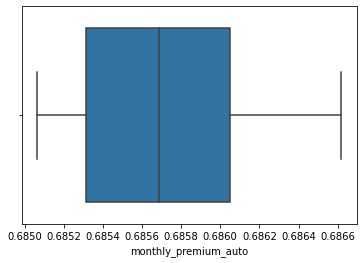

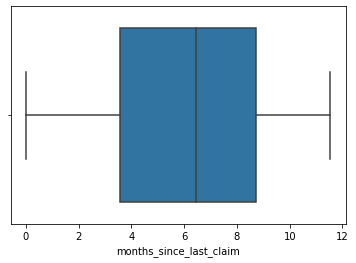

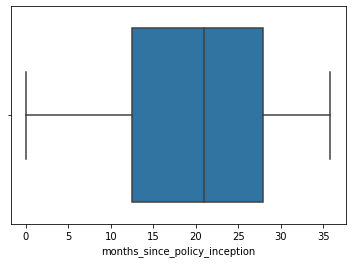

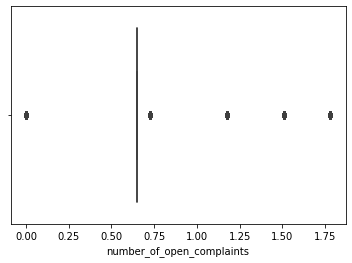

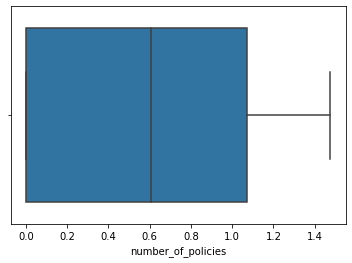

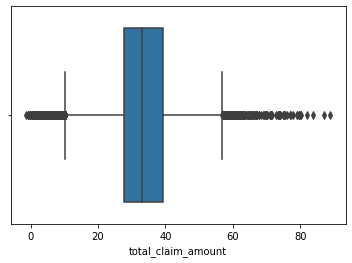

In [19]:
#checking boxplots again

num = data.select_dtypes([np.number])
cat = data.select_dtypes('object')

for col in num.columns:
    sns.boxplot(num[col])
    plt.show()

In [20]:
#manually removing outliers for customer lifetime value

iqr_life = np.percentile(num['customer_lifetime_value'],75) - np.percentile(num['customer_lifetime_value'],25)


upper_limit_life = np.percentile(num['customer_lifetime_value'],75) + 1.5*iqr_life
lower_limit_life = np.percentile(num['customer_lifetime_value'],25) - 1.5*iqr_life

#showing iqr + lower and upper limits
iqr_life, upper_limit_life, lower_limit_life

#removing outliers
num['customer_lifetime_value'] = num[(num['customer_lifetime_value']>lower_limit_life) & (num['customer_lifetime_value']<upper_limit_life)]

<AxesSubplot:xlabel='customer_lifetime_value'>

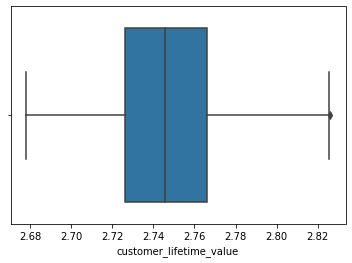

In [21]:
sns.boxplot(num['customer_lifetime_value'])

## Processing Data

(Further processing...)

- X-y split. (done)
- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

**X-Y Split** If you have not done it, you have you take in count that the target will be `total_claim_amount`

In [22]:
X = num.drop('total_claim_amount', axis=1)
y = num['total_claim_amount']

In [23]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
mean_life = X['customer_lifetime_value'].mean()
X = X.fillna(mean_life)
X.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [25]:
#checking on model before normalizing it


X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     493.3
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:00:56   Log-Likelihood:                -34009.
No. Observations:                9134   AIC:                         6.803e+04
Df Residuals:                    9126   BIC:                         6.809e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Normalize (numerical)** If you have not done it yet, you can define a function using `StandardScaler`from sklearn library

In [26]:
transformer = StandardScaler()

transformer.fit(X)

x_standardized = transformer.transform(X)
x_standardized

array([[ 0.        , -1.39701153,  0.35130554, ..., -1.77878773,
         0.11248968, -1.16706791],
       [ 0.        ,  0.27487106,  0.08566055, ..., -0.13305694,
         0.11248968,  1.54824637],
       [ 0.        ,  1.12071623,  0.00627917, ..., -0.27830998,
         0.11248968, -0.00929297],
       ...,
       [ 0.        ,  0.50840744,  0.08566055, ..., -0.31529527,
         2.0447642 , -0.00929297],
       [ 0.        ,  0.38845993, -1.45415381, ..., -1.9197403 ,
         0.11248968,  0.53622145],
       [ 0.        , -1.51725046,  0.08566055, ...,  1.38981576,
         0.11248968, -1.16706791]])

In [27]:
X_stand = pd.DataFrame(x_standardized)
X_stand

,0,1,2,3,4,5,6,7
0,0.0,-1.397012,0.351306,-0.850611,1.483360,-1.778788,0.112490,-1.167068
1,0.0,0.274871,0.085661,0.433574,-0.113484,-0.133057,0.112490,1.548246
2,0.0,1.120716,0.006279,0.846936,0.371627,-0.278310,0.112490,-0.009293
3,0.0,0.412269,0.085661,0.796030,0.371627,0.637519,0.112490,1.432155
4,0.0,-1.359179,-0.231836,-0.571535,-0.219656,-0.061927,0.112490,-1.167068
...,...,...,...,...,...,...,...,...
9129,0.0,1.788240,1.017597,-0.571535,0.371627,1.360986,0.112490,-0.009293
9130,0.0,-1.161704,-1.476053,-0.216971,-0.010775,-0.662493,0.112490,-1.167068
9131,0.0,0.508407,0.085661,0.077139,-0.563687,-0.315295,2.044764,-0.009293
9132,0.0,0.388460,-1.454154,0.501756,1.623127,-1.919740,0.112490,0.536221


In [28]:
X.columns

Index(['const', 'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

In [29]:
#dropping column 0 (no values)
X_stand = X_stand.drop(0, axis=1)

In [30]:
#changing column names

cols = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']

X_stand.columns = cols
X_stand

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-1.397012,0.351306,-0.850611,1.483360,-1.778788,0.112490,-1.167068
1,0.274871,0.085661,0.433574,-0.113484,-0.133057,0.112490,1.548246
2,1.120716,0.006279,0.846936,0.371627,-0.278310,0.112490,-0.009293
3,0.412269,0.085661,0.796030,0.371627,0.637519,0.112490,1.432155
4,-1.359179,-0.231836,-0.571535,-0.219656,-0.061927,0.112490,-1.167068
...,...,...,...,...,...,...,...
9129,1.788240,1.017597,-0.571535,0.371627,1.360986,0.112490,-0.009293
9130,-1.161704,-1.476053,-0.216971,-0.010775,-0.662493,0.112490,-1.167068
9131,0.508407,0.085661,0.077139,-0.563687,-0.315295,2.044764,-0.009293
9132,0.388460,-1.454154,0.501756,1.623127,-1.919740,0.112490,0.536221


In [31]:
mean_life2 = X_stand['customer_lifetime_value'].mean()
X_stand = X_stand.fillna(mean_life2)
X_stand.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [32]:
#checking on model after normalizing it
#model has not improved after normalizing it  --> months since policy inception can be dropped (pvalue = 0.619) --> didn't change R-squared

X_stand = X_stand.drop('months_since_policy_inception', axis=1)

X_stand = sm.add_constant(X_stand)

model = sm.OLS(y,X_stand).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     575.5
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:01:02   Log-Likelihood:                -34010.
No. Observations:                9134   AIC:                         6.803e+04
Df Residuals:                    9127   BIC:                         6.808e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**One Hot/Label Encoding (categorical)** Try one of the two options learned in class

In [33]:
#deciding which columns make sense to use
#customer doesn't give any value for prediction (only uniquw values) --> will be dropped

cat = cat.drop('customer', axis=1)

cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [34]:
cat['response'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
#wringing function to show unique values for all categorical columns --> now need to do further cleaning
    
for column in cat.columns:
    print(column, cat[column].unique())

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


In [36]:
cat.state.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [37]:
#checking the value counts of the different categorical columns --> some features could be merged to reduce number of columns --> but which and how to decide?
for column in cat.columns:
    print(column, cat[column].value_counts())

state California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
response No     7826
Yes    1308
Name: response, dtype: int64
coverage Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
education Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
employmentstatus Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
gender F    4658
M    4476
Name: gender, dtype: int64
location_code Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
marital_status Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
policy_type Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
policy

In [38]:
#will chose one hot encoder (get dummies) --> this would create 42 more rows --> easiest way (will try this and see how the model will look like)

cat_encoded = pd.get_dummies(cat, drop_first=True)
cat_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
9130,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9131,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9132,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


**Concat DataFrames**

In [39]:
#concatenating numerical standardized + encoded categorical dataframes
X_concat = pd.concat([X_stand, cat_encoded], axis=1)
X_concat

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,1.0,-1.397012,0.351306,-0.850611,1.483360,0.112490,-1.167068,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1.0,0.274871,0.085661,0.433574,-0.113484,0.112490,1.548246,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1.0,1.120716,0.006279,0.846936,0.371627,0.112490,-0.009293,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1.0,0.412269,0.085661,0.796030,0.371627,0.112490,1.432155,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,1.0,-1.359179,-0.231836,-0.571535,-0.219656,0.112490,-1.167068,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,1.788240,1.017597,-0.571535,0.371627,0.112490,-0.009293,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
9130,1.0,-1.161704,-1.476053,-0.216971,-0.010775,0.112490,-1.167068,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9131,1.0,0.508407,0.085661,0.077139,-0.563687,2.044764,-0.009293,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9132,1.0,0.388460,-1.454154,0.501756,1.623127,0.112490,0.536221,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [40]:
#checking on model after concatenating dataframes

#why did the R-squared double again?!
#would all the high p-values be deleted at this point?

X_concat = sm.add_constant(X_concat)

model = sm.OLS(y,X_concat).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     919.3
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:01:09   Log-Likelihood:                -27402.
No. Observations:                9134   AIC:                         5.490e+04
Df Residuals:                    9085   BIC:                         5.525e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [41]:
X_concat.corr()

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,NaN,1.000000,0.014780,0.462106,0.011236,-0.034503,0.496025,0.008811,-0.001479,0.010046,-0.018533,-0.005495,0.118379,0.173708,-0.012772,-0.016247,0.029157,0.012120,0.063130,-0.019770,-0.019062,-0.052152,-0.011204,-0.012687,0.011328,0.035166,-0.045337,-0.000433,0.021229,-0.009105,-0.012568,0.000996,0.002858,-0.003588,0.003705,0.011882,0.018507,-0.085577,-0.001033,-0.066694,0.001371,0.005413,-0.021656,0.149887,0.160625,0.242447,0.120771,-0.118769,0.017518,0.003214
income,NaN,0.014780,1.000000,-0.002603,-0.029307,0.016877,0.002333,-0.001116,0.005270,-0.000122,0.006424,-0.094875,-0.023262,0.011461,-0.012984,-0.004095,0.011447,0.005377,0.355814,-0.352636,-0.279471,0.049940,0.004585,-0.287080,0.161072,0.029549,0.008156,-0.010931,0.008524,0.011070,0.008824,0.009511,-0.016963,-0.001796,-0.012274,0.012031,0.009026,0.087606,0.015653,0.037663,-0.006881,0.011118,0.004194,0.014044,-0.013809,-0.005301,-0.018366,0.016892,0.005559,0.002127
monthly_premium_auto,NaN,0.462106,-0.002603,1.000000,-0.003780,-0.007952,-0.010642,0.012499,0.018659,0.003663,-0.019478,0.011429,0.334470,0.365264,-0.003270,-0.012618,0.030599,0.005901,-0.007069,-0.014658,-0.009548,0.019556,0.001655,0.064281,-0.039069,0.004915,0.003408,-0.000503,0.005943,0.012624,-0.012782,-0.004855,0.001041,0.002073,0.002545,0.009745,-0.002582,-0.064879,-0.013582,-0.051241,0.009430,-0.006389,-0.012320,0.266337,0.284668,0.523800,0.257128,-0.254654,0.014214,-0.011497
months_since_last_claim,NaN,0.011236,-0.029307,-0.003780,1.000000,0.001197,0.010648,-0.001613,-0.000298,-0.010772,0.010136,-0.028431,0.007221,0.016443,0.024910,-0.001677,-0.010081,0.006137,-0.007802,0.014834,-0.013571,0.009141,0.023632,-0.009778,-0.006819,0.016293,-0.002645,-0.013372,-0.004671,0.014646,0.011968,-0.000801,-0.003840,-0.008150,-0.021849,0.000411,0.006857,0.004462,-0.004363,-0.016002,0.006879,0.016101,-0.016679,0.002910,0.006554,-0.022623,-0.000067,0.000720,0.013725,-0.010943
number_of_open_complaints,NaN,-0.034503,0.016877,-0.007952,0.001197,1.000000,-0.000871,-0.019554,0.014671,0.005961,-0.009125,0.009848,0.012002,-0.004460,0.025833,0.008433,-0.017343,-0.017879,-0.008675,-0.011909,-0.019109,0.012376,0.005431,0.003760,0.016102,-0.027571,0.023416,0.012172,0.013264,-0.023591,-0.007201,-0.004524,0.004707,0.010079,0.013496,-0.003891,0.015964,0.031813,-0.007448,0.033315,-0.024104,-0.008025,0.014176,-0.001492,-0.020260,-0.002758,-0.005402,0.015843,0.002894,-0.013799
number_of_policies,NaN,0.496025,0.002333,-0.010642,0.010648,-0.000871,1.000000,0.007477,-0.029495,0.005114,-0.012951,-0.033619,-0.008603,-0.017159,-0.014570,-0.003680,0.018562,-0.004619,-0.002888,-0.001786,-0.025344,0.015239,0.015320,-0.010905,0.012393,0.009451,0.001615,0.000011,0.000051,0.007085,-0.002816,0.019823,-0.013721,-0.0

## Linear Regression

- Train-test split.
- Apply linear regression.

**Train-test split** Divide your data in a train part and a test part

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_concat, y, test_size=0.3, random_state=13)

**Apply linear regression** For this question you can use `statsmodels` or `sklearn` libraries

In [43]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
predictions = model_reg.predict(X_test)

## Model Validation

- Description:
R2.
MSE.
RMSE.
MAE.

**Get R2 from the model**

In [45]:
r2_score(y_test, predictions)

0.8241931431832621

**Get MSE from the model**

In [46]:
from scipy.special import inv_boxcox

In [47]:
predictions = inv_boxcox(predictions, _ci['total_claim_amount'])

In [48]:
mean_squared_error(y_test, predictions, squared=True)

206179.08889966388

**Get RMSE from the model**

In [49]:
mean_squared_error(y_test, predictions, squared=False)

454.06947585106826

**Get MAE from the model**

In [50]:
mean_absolute_error(y_test, predictions)

389.360281407182

In [51]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['total_claim_amount'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
791,42.248087,45.771210,3.523123
1822,151.843731,60.546823,91.296908
4908,148.778455,53.004912,95.773543
9100,460.800000,499.859628,39.059628
6403,1080.559002,712.804768,367.754234
...,...,...,...
167,292.800000,434.298410,141.498410
6819,580.800000,639.025750,58.225750
7319,96.338144,179.369295,83.031151
4271,518.400000,620.813304,102.413304


In [52]:
results.describe()

,true,pred,resid
count,2741.000000,2741.000000,2741.000000
mean,431.460899,422.120732,85.523441
std,290.986933,244.394316,95.287336
min,0.382107,35.480686,0.017601
25%,262.865172,253.171210,31.284318
50%,379.200000,414.261267,60.747686
75%,550.127548,564.905004,103.199904
max,2452.894264,1526.071655,1169.552361
